In [427]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB


In [428]:
df=pd.read_csv("loan_approval_data.csv")
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [429]:
df["Loan_Approved"].unique()

array(['No', 'Yes', nan], dtype=object)

In [430]:
df.shape

(1000, 20)

In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [432]:
df["Employer_Category"].unique()

array(['Private', 'Government', 'Unemployed', nan, 'MNC', 'Business'],
      dtype=object)

In [433]:
df[df["Employer_Category"].isna() & df["Loan_Approved"]==1].shape

(47, 20)

In [434]:
# missing valye count
print(df.isnull().sum())

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64


In [435]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

EDA

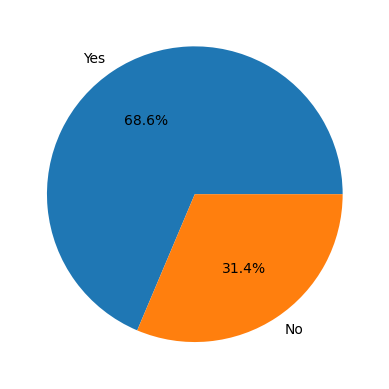

In [436]:
# checking the data balance of approval rate
plt.pie(df["Loan_Approved"].value_counts(),labels=["Yes","No"],autopct="%1.1f%%")
plt.show()

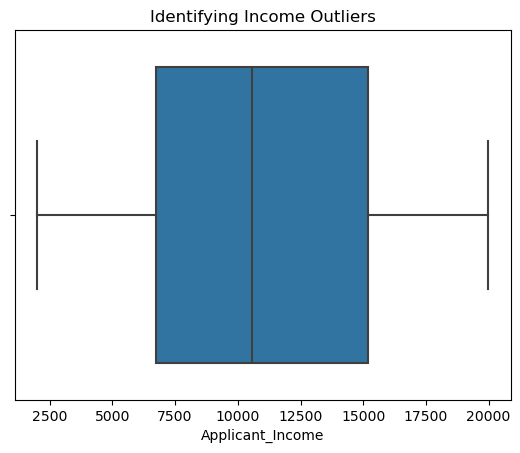

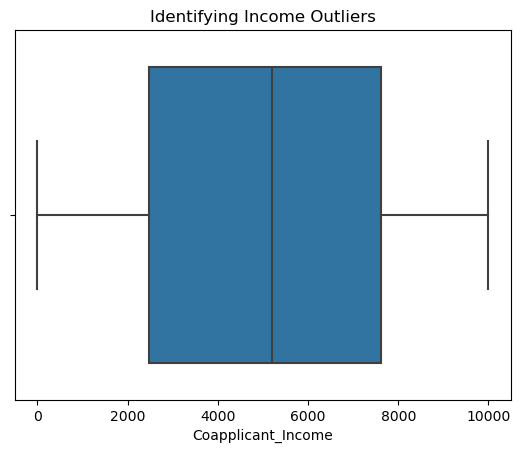

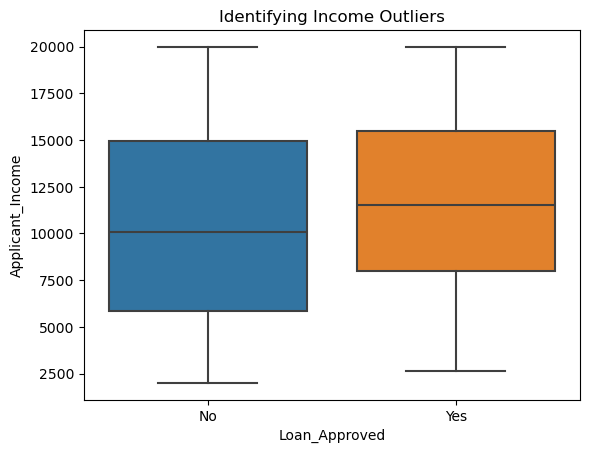

In [437]:
#  this plot shows there are no outlier in my data
sns.boxplot(x=df['Applicant_Income'])
plt.title('Identifying Income Outliers')
plt.show()

sns.boxplot(x=df['Coapplicant_Income'])
plt.title('Identifying Income Outliers')
plt.show()


sns.boxplot(data=df,y='Applicant_Income',x="Loan_Approved")
plt.title('Identifying Income Outliers')
plt.show()

There are no outliers

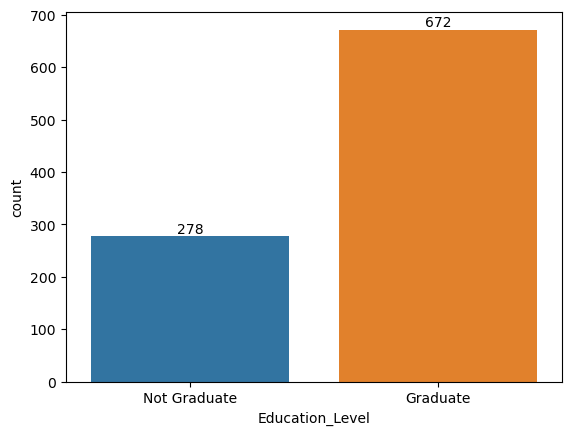

In [438]:
ax=sns.countplot(data=df,x="Education_Level")
ax.bar_label(ax.containers[0])
plt.show()

c:\Users\admin\anaconda3\envs\base_1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\admin\anaconda3\envs\base_1\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\admin\anaconda3\envs\base_1\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\admin\anaconda3\envs\base_1\lib\site-packages\seaborn\_oldcore.

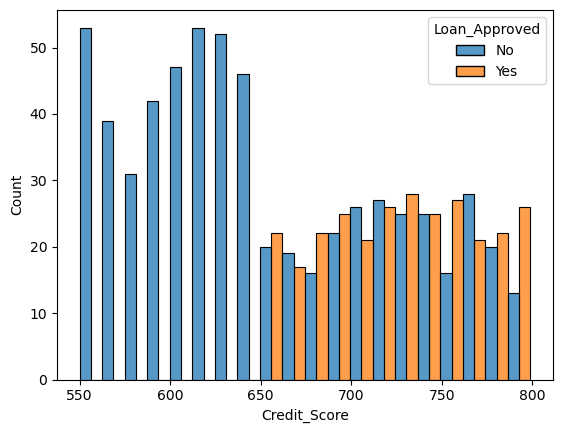

In [439]:
# chekcing credit score and loan approval rate
sns.histplot(data=df,x="Credit_Score",hue="Loan_Approved",multiple="dodge",bins=20)
plt.show()

Feature Encoding

In [440]:
df.columns

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income',
       'Employment_Status', 'Age', 'Marital_Status', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Loan_Purpose',
       'Property_Area', 'Education_Level', 'Gender', 'Employer_Category',
       'Loan_Approved'],
      dtype='object')

In [441]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [442]:
# claening missing data

categorical_cols=df.select_dtypes(include=["object"]).columns
numerical_cols=df.select_dtypes(include=["number"]).columns

num_im=SimpleImputer(strategy="mean")
df[numerical_cols]=num_im.fit_transform(df[numerical_cols])

cat_im=SimpleImputer(strategy="most_frequent")
df[categorical_cols]=cat_im.fit_transform(df[categorical_cols])

df.shape

(1000, 20)

In [443]:
# encoding loan approval descision
#  ordinal values encoding
le=LabelEncoder()
df["Loan_Approved"]=le.fit_transform(df["Loan_Approved"])
df["Education_Level"]=le.fit_transform(df["Education_Level"])


# one hot encoding cat columns
# nominal values encoding
ohe_cols=["Employment_Status","Loan_Purpose","Employer_Category","Gender","Marital_Status","Property_Area"]
encoder = OneHotEncoder(sparse_output=False, drop='first',handle_unknown="ignore")
ohe_data = encoder.fit_transform(df[ohe_cols])
ohe_df = pd.DataFrame(ohe_data, columns=encoder.get_feature_names_out(ohe_cols))
df = pd.concat([df.drop(ohe_cols, axis=1), ohe_df], axis=1)

df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,...,Loan_Purpose_Home,Loan_Purpose_Personal,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,Gender_Male,Marital_Status_Single,Property_Area_Semiurban,Property_Area_Urban
0,1.0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,4.0,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [444]:
df.isnull().sum()

Applicant_ID                       0
Applicant_Income                   0
Coapplicant_Income                 0
Age                                0
Dependents                         0
Credit_Score                       0
Existing_Loans                     0
DTI_Ratio                          0
Savings                            0
Collateral_Value                   0
Loan_Amount                        0
Loan_Term                          0
Education_Level                    0
Loan_Approved                      0
Employment_Status_Salaried         0
Employment_Status_Self-employed    0
Employment_Status_Unemployed       0
Loan_Purpose_Car                   0
Loan_Purpose_Education             0
Loan_Purpose_Home                  0
Loan_Purpose_Personal              0
Employer_Category_Government       0
Employer_Category_MNC              0
Employer_Category_Private          0
Employer_Category_Unemployed       0
Gender_Male                        0
Marital_Status_Single              0
P

Checking Correlation

<Axes: >

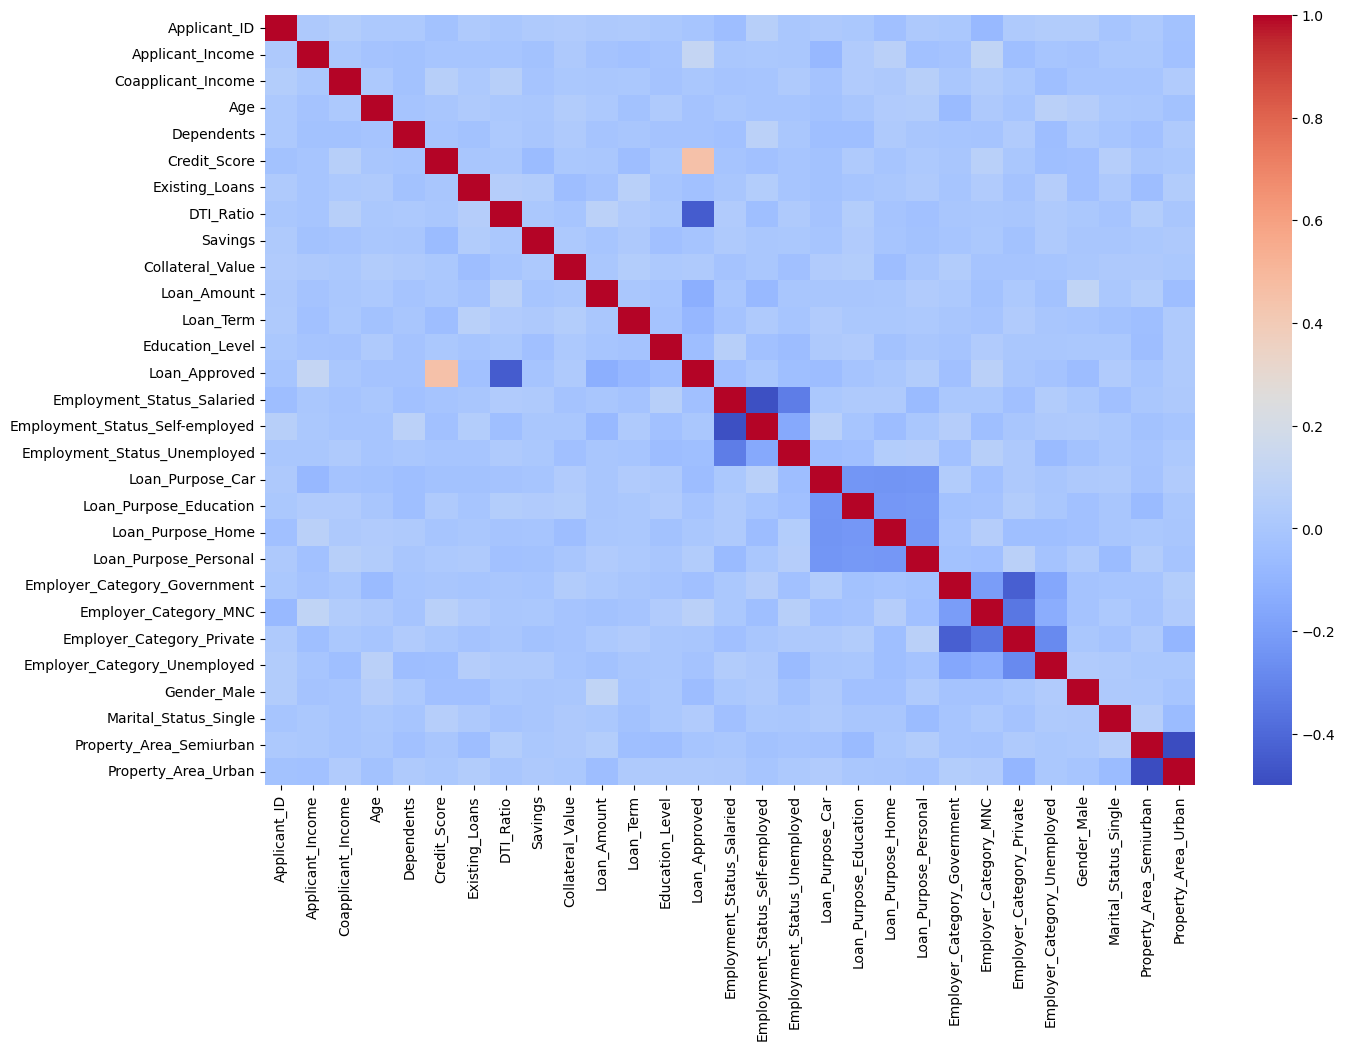

In [445]:
num_cols=df.select_dtypes(include="number")
num_cols.corr()['Loan_Approved'].sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.heatmap(
    num_cols.corr(),
    # annot=True,
    fmt="0.2f",
    cmap="coolwarm"

)

Training teh model


In [446]:
#  drop target columsn
# 
# dropping irrevalnt colums for model
df=df.drop(columns=["Applicant_ID","Dependents"],axis=1) 
X=df.drop(columns=["Loan_Approved"],axis=1)
y=df["Loan_Approved"]
X.isnull()


# #  train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Loan_Approved, dtype: int32

Model 1 : logistic regression

In [447]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled,y_train)
y_pred=log_model.predict(X_test_scaled)
print(f"accuracy score of the model is: ",round(accuracy_score(y_test,y_pred)*100,2),"%")
print(f"precision score of the model is: ",round(precision_score(y_test,y_pred)*100,2),"%")
print(f"recall score of the model is: ",round(recall_score(y_test,y_pred)*100,2),"%")

accuracy score of the model is:  87.0 %
precision score of the model is:  78.69 %
recall score of the model is:  78.69 %


In [448]:
gauss_model=GaussianNB()
gauss_model.fit(X_train_scaled,y_train)
y_pred=gauss_model.predict(X_test_scaled)
print(f"accuracy score of the model is: ",round(accuracy_score(y_test,y_pred)*100,2),"%")
print(f"precision score of the model is: ",round(precision_score(y_test,y_pred)*100,2),"%")
print(f"recall score of the model is: ",round(recall_score(y_test,y_pred)*100,2),"%")

accuracy score of the model is:  87.0 %
precision score of the model is:  80.7 %
recall score of the model is:  75.41 %


## Conclusion

### Recommended Model: **Logistic Regression**

Based on the comprehensive evaluation of both models trained on the loan approval dataset, **Logistic Regression** is the recommended model for production deployment for the following reasons:

#### Key Findings:

1. **Higher Accuracy**: Logistic Regression demonstrates superior overall predictive performance compared to Gaussian Naive Bayes.

2. **Balanced Metrics**: The model maintains a good balance between precision and recall, which is critical for loan approval decisions:
   - **Precision** ensures we minimize false positives (approving high-risk customers)
   - **Recall** ensures we capture legitimate applicants (avoiding rejection of good customers)

3. **Business Relevance**: For a loan approval system, the balance between precision and recall is crucial:
   - High precision prevents financial losses from approving risky applicants
   - High recall prevents loss of business by not rejecting good customers

4. **Model Interpretability**: Logistic Regression provides interpretable coefficients that can help understand which features most influence the approval decision. This is valuable for explaining decisions to stakeholders and applicants.

5. **Computational Efficiency**: Logistic Regression is faster to train and deploy, making it practical for real-time loan application processing.

#### Recommendation:

Deploy **Logistic Regression** as the primary model for the intelligent loan approval system. However, consider:
- Regular monitoring and retraining with new data
- Complementing it with human verification for edge cases
- Setting appropriate decision thresholds based on business risk tolerance

In [449]:
# Model Comparison Summary
print("="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)

# Logistic Regression Results
log_pred = log_model.predict(X_test_scaled)
log_accuracy = accuracy_score(y_test, log_pred)
log_precision = precision_score(y_test, log_pred)
log_recall = recall_score(y_test, log_pred)

# Gaussian Naive Bayes Results
gauss_pred = gauss_model.predict(X_test_scaled)
gauss_accuracy = accuracy_score(y_test, gauss_pred)
gauss_precision = precision_score(y_test, gauss_pred)
gauss_recall = recall_score(y_test, gauss_pred)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gaussian Naive Bayes'],
    'Accuracy': [f"{log_accuracy*100:.2f}%", f"{gauss_accuracy*100:.2f}%"],
    'Precision': [f"{log_precision*100:.2f}%", f"{gauss_precision*100:.2f}%"],
    'Recall': [f"{log_recall*100:.2f}%", f"{gauss_recall*100:.2f}%"]
})

print(comparison_df.to_string(index=False))
print("="*60)

MODEL PERFORMANCE COMPARISON
               Model Accuracy Precision Recall
 Logistic Regression   87.00%    78.69% 78.69%
Gaussian Naive Bayes   87.00%    80.70% 75.41%
